In [ ]:
import pandas as pd
import numpy as np
import nltk
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.externals import joblib
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize 
from sklearn.utils import shuffle
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model
import os.path
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.utils import class_weight
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned data-2.csv to cleaned data-2.csv


In [ ]:
df = pd.read_csv("cleaned data-2.csv", encoding='utf8')
df

,Id,Text,Class,Filtered_sentence
0,0,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේර...,Political,දින එකාබද්ධ විපක්ෂ මාධ්‍ ලේක රේනුක පෙරේර මහත න...
1,1,මා UNP හෝ ඒකාබද්ධ විපක්ෂය මගින් හෝ දැනට පවතින ...,Political,මා එක්සත් ජාතික පක්ෂ එකාබද්ධ විපක්ෂ පවති කිසි ...
2,2,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන මා...,Neutral,කිම තර කොහේද විද ගල උරන මා මිතුර පරය
3,3,එහෙම කොහොමද උනේ 😂😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙ කොහොම උනේ 😂😂 පරය අපි අය කරල නේ 😂
4,4,විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා පරය ...,Political,විමල ගොන වගෙ එකෙ මෑරෙ හද පරය රටට වෑඩ කර යකො හොර
...,...,...,...,...
1674,1705,පීටීඒ සහ අයිසීසීපීආර් පනත යටතේ වැරදි ලෙස ගොනු ...,Racist,පීටීඑ අයිසීසීපීඅර පනත යටත වැරදි ගො කර විමර්ෂ න...
1675,1706,අරාබි රටවල් මුස්ලිම් නොවන සඳහා සුපිරි වෙළඳසැල්...,Racist,අරාබි රට මුස්ලි නොව සුපිරි වෙලදසැල වල තිබ උරු ...
1676,1707,හැවිරිදි මුස්ලිම් පිරිමි ළමයෙක් ඉස්ලාම් භීතික...,Racist,හැවිරිදි මුස්ලි පිරි ලමය ඉස්ලා බීතික ඉලක්ක පත්...
1677,1708,ශ්‍රී ලංකාවේ මුස්ලිම් ප්‍රජාව වෙත එල්ල කරන දේ...,Racist,ලංක මුස්ලි ප්‍රජා එල් කරන දේෂපාල අගමික පීඩන සම...


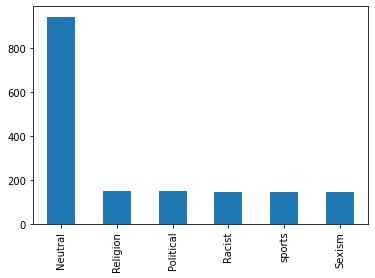

In [ ]:
%matplotlib inline
df['Class'].value_counts().plot(kind="bar")

def plot_history(history):
    plt.title('Data-Set')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

In [ ]:
class_to_num = {"Class": {'Religion': 5,
                'Racist': 4,
                'Political': 3,
                'sports':2,
                'Sexism': 1,
                'Neutral':0
                }}

In [ ]:
df = df.replace(class_to_num)
df

,Id,Text,Class,Filtered_sentence
0,0,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේර...,3,දින එකාබද්ධ විපක්ෂ මාධ්‍ ලේක රේනුක පෙරේර මහත න...
1,1,මා UNP හෝ ඒකාබද්ධ විපක්ෂය මගින් හෝ දැනට පවතින ...,3,මා එක්සත් ජාතික පක්ෂ එකාබද්ධ විපක්ෂ පවති කිසි ...
2,2,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන මා...,0,කිම තර කොහේද විද ගල උරන මා මිතුර පරය
3,3,එහෙම කොහොමද උනේ 😂😂 පරය අපිව අයින් කරල නේ 😂,0,එහෙ කොහොම උනේ 😂😂 පරය අපි අය කරල නේ 😂
4,4,විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා පරය ...,3,විමල ගොන වගෙ එකෙ මෑරෙ හද පරය රටට වෑඩ කර යකො හොර
...,...,...,...,...
1674,1705,පීටීඒ සහ අයිසීසීපීආර් පනත යටතේ වැරදි ලෙස ගොනු ...,4,පීටීඑ අයිසීසීපීඅර පනත යටත වැරදි ගො කර විමර්ෂ න...
1675,1706,අරාබි රටවල් මුස්ලිම් නොවන සඳහා සුපිරි වෙළඳසැල්...,4,අරාබි රට මුස්ලි නොව සුපිරි වෙලදසැල වල තිබ උරු ...
1676,1707,හැවිරිදි මුස්ලිම් පිරිමි ළමයෙක් ඉස්ලාම් භීතික...,4,හැවිරිදි මුස්ලි පිරි ලමය ඉස්ලා බීතික ඉලක්ක පත්...
1677,1708,ශ්‍රී ලංකාවේ මුස්ලිම් ප්‍රජාව වෙත එල්ල කරන දේ...,4,ලංක මුස්ලි ප්‍රජා එල් කරන දේෂපාල අගමික පීඩන සම...


In [ ]:
# split into train/test sets
sentences = df['Filtered_sentence'].values.astype('U')
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.1, random_state=42)

tags = ['0','1', '2','3','4','5']

Multinomial Naive Bayes model

In [ ]:
def nb_train(X_train, X_test, y_train, y_test):
    nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB())])
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    print('Accuracy: %s' % accuracy_score(y_pred, y_test)) #test_size=0.1, random_state=42 - Multinomial Naive Bayes model
    print(classification_report(y_test, y_pred,target_names=tags))
    return nb

nb_train(X_train, X_test, y_train, y_test)

Accuracy: 0.625
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       103
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         9
           3       1.00      0.08      0.14        13
           4       0.00      0.00      0.00        18
           5       1.00      0.09      0.17        11

    accuracy                           0.62       168
   macro avg       0.44      0.19      0.18       168
weighted avg       0.52      0.62      0.49       168



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
def nb_train(X_train, X_test, y_train, y_test):
    nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB())])
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    print('Accuracy: %s' % accuracy_score(y_pred, y_test)) #test_size=0.1, random_state=42 - Multinomial Naive Bayes model
    print(classification_report(y_test, y_pred,target_names=tags))
    return nb

nb_train(X_train, X_test, y_train, y_test)

Accuracy: 0.625
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       103
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         9
           3       1.00      0.08      0.14        13
           4       0.00      0.00      0.00        18
           5       1.00      0.09      0.17        11

    accuracy                           0.62       168
   macro avg       0.44      0.19      0.18       168
weighted avg       0.52      0.62      0.49       168



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
#KNN
def knn_train(X_train, X_test, y_train, y_test):
    knn = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', KNeighborsClassifier(n_neighbors=17, p=6,metric='euclidean'))])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy: %s' % accuracy_score(y_pred, y_test)) #test_size=0.1, random_state=42 - Multinomial Naive Bayes model
    print(classification_report(y_test, y_pred,target_names=tags))
    return knn

knn_train(X_train, X_test, y_train, y_test)

Accuracy: 0.6130952380952381
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       103
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        11

    accuracy                           0.61       168
   macro avg       0.10      0.17      0.13       168
weighted avg       0.38      0.61      0.47       168



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='euclidean', metric_params=None,
     

In [ ]:
#RF
from sklearn import decomposition, ensemble
def nb_train(X_train, X_test, y_train, y_test):
    nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', ensemble.RandomForestClassifier())])
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    print('Accuracy: %s' % accuracy_score(y_pred, y_test)) #test_size=0.1, random_state=42 - Multinomial Naive Bayes model
    print(classification_report(y_test, y_pred,target_names=tags))
    return nb

nb_train(X_train, X_test, y_train, y_test)

Accuracy: 0.6726190476190477
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       103
           1       0.00      0.00      0.00        14
           2       0.83      0.56      0.67         9
           3       0.44      0.31      0.36        13
           4       0.86      0.33      0.48        18
           5       0.75      0.27      0.40        11

    accuracy                           0.67       168
   macro avg       0.60      0.40      0.45       168
weighted avg       0.64      0.67      0.62       168



Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                

In [ ]:
#LR
from sklearn import linear_model
def nb_train(X_train, X_test, y_train, y_test):
    nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', linear_model.LogisticRegression())])
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    print('Accuracy: %s' % accuracy_score(y_pred, y_test)) #test_size=0.1, random_state=42 - Multinomial Naive Bayes model
    print(classification_report(y_test, y_pred,target_names=tags))
    return nb

nb_train(X_train, X_test, y_train, y_test)

Accuracy: 0.7023809523809523
              precision    recall  f1-score   support

           0       0.69      0.99      0.82       103
           1       0.00      0.00      0.00        14
           2       0.71      0.56      0.63         9
           3       0.75      0.23      0.35        13
           4       0.71      0.28      0.40        18
           5       1.00      0.27      0.43        11

    accuracy                           0.70       168
   macro avg       0.65      0.39      0.44       168
weighted avg       0.66      0.70      0.63       168



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
  

In [ ]:
#Svm
def svc_train(X_train, X_test, y_train, y_test):
    sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', svm.SVC()),
               ])
    sgd.fit(X_train, y_train)
    y_pred = sgd.predict(X_test)
    print('Accuracy %s' % accuracy_score(y_pred, y_test)) #test_size=0.2, random_state=45-Multinomial Naive Bayes model
    print(classification_report(y_test, y_pred,target_names=tags))
    return sgd

svc_train(X_train, X_test, y_train, y_test)

Accuracy 0.6607142857142857
              precision    recall  f1-score   support

           0       0.66      0.96      0.78       103
           1       0.00      0.00      0.00        14
           2       0.75      0.33      0.46         9
           3       0.75      0.23      0.35        13
           4       0.75      0.17      0.27        18
           5       1.00      0.27      0.43        11

    accuracy                           0.66       168
   macro avg       0.65      0.33      0.38       168
weighted avg       0.65      0.66      0.59       168



Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,

In [ ]:
#SGD
def svc_train(X_train, X_test, y_train, y_test):
    sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
    sgd.fit(X_train, y_train)
    y_pred = sgd.predict(X_test)
    print('Accuracy %s' % accuracy_score(y_pred, y_test)) #test_size=0.2, random_state=45-Multinomial Naive Bayes model
    print(classification_report(y_test, y_pred,target_names=tags))
    return sgd

svc_train(X_train, X_test, y_train, y_test)

Accuracy 0.6726190476190477
              precision    recall  f1-score   support

           0       0.68      0.92      0.79       103
           1       0.00      0.00      0.00        14
           2       0.67      0.67      0.67         9
           3       0.57      0.31      0.40        13
           4       0.57      0.22      0.32        18
           5       0.67      0.36      0.47        11

    accuracy                           0.67       168
   macro avg       0.53      0.41      0.44       168
weighted avg       0.60      0.67      0.61       168



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [ ]:
from sklearn import decomposition, ensemble
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', linear_model.LogisticRegression()),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
  

In [ ]:
sgd.predict(X_test)

array([3, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 4, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0,
       0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from pickle import load, dump
dump(sgd, open("model.pkl", "wb"))
model = load(open("model.pkl", "rb"))

y_pred = model.predict(X_test)

print('Accuracy %s' % accuracy_score(y_pred, y_test))

print(classification_report(y_test, y_pred,target_names=tags))

Accuracy 0.7023809523809523
              precision    recall  f1-score   support

           0       0.69      0.99      0.82       103
           1       0.00      0.00      0.00        14
           2       0.71      0.56      0.63         9
           3       0.75      0.23      0.35        13
           4       0.71      0.28      0.40        18
           5       1.00      0.27      0.43        11

    accuracy                           0.70       168
   macro avg       0.65      0.39      0.44       168
weighted avg       0.66      0.70      0.63       168



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred

array([3, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 4, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0,
       0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
labels = ['Sexism','sports','Political','Racist','Religion','Neutral']

In [ ]:
text = "මහ බැංකුවේ ලයිට් දාලා බයියෝ චූන් කරලා අදට හරියටම අවුරුද්දයි"

pred = model.predict([text])
print(labels[pred[0]-1])

Neutral


In [ ]:
import seaborn as sn
sn.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: ignored

(0.8912509381337456,
 11.220184543019636,
 0.8912509381337456,
 11.220184543019636)

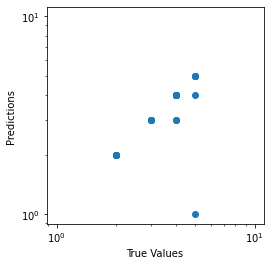

In [ ]:
g=plt.scatter(y_test,y_pred)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')


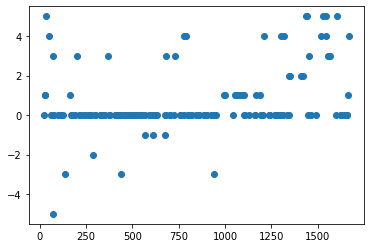

In [ ]:
g=plt.plot(y_test - y_pred,marker='o',linestyle='')

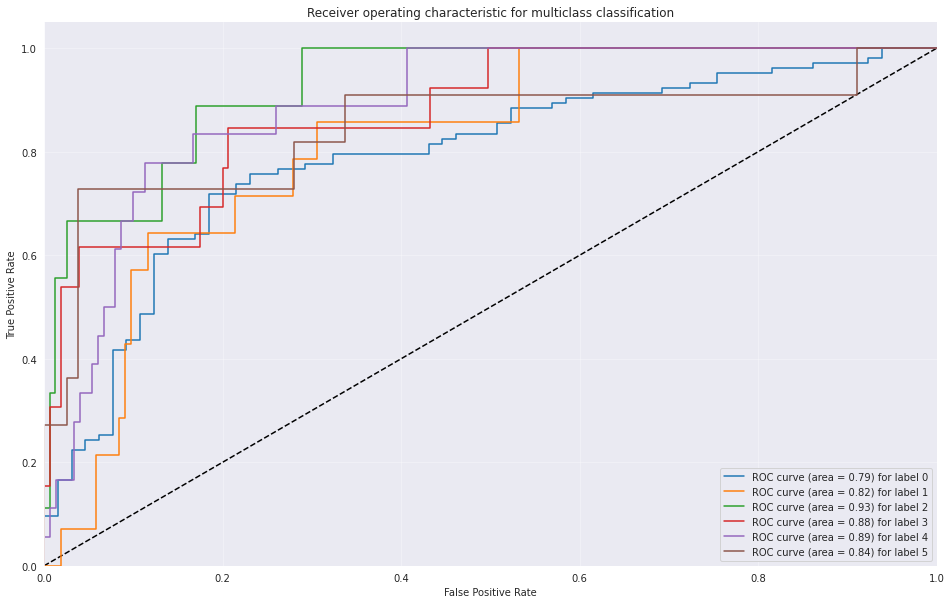

In [ ]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for multiclass classification')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(model, X_test, y_test, n_classes=6, figsize=(16, 10))